In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from itertools import product
import sys,os
import time

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("/home/olya/SFU/Breast_cancer/DESMOND/"))

from find_optimal_parameters import parse_biclust,read_true_bics,read_all_results
from find_optimal_parameters import  F1_per_bic,plot_F1_heatmap,get_opt_params

%matplotlib inline

In [2]:
# and prefix of input file name
fname_prefix = "simulated.N=10.Mu=2.0.GxP="
# suffix idication overlap type
overlap = "TT"
# where are output files
out_dir = "../simulated_datasets/results/"

# sizes of biclusters
g_sizes = [5,10,20,50,100]
s_sizes = [10,20,50,100]

# true biclusters 
true_bic_dir = "../simulated_datasets/true_biclusters/"
true_bic_fname_prefix = fname_prefix
true_bic_fname_suffix = ".overlap="+overlap+".biclusters.txt"

In [3]:
# predicted biclusters 
tool_name = "QUBIC"
tool_suffix = "QUBIC_QB"
n_runs = 1

parameters = (("r",[1,2,3,4,5,7,10]),
              ("q",[0.05,0.06,0.1,0.25,0.5,0.75]),
              ("c",[0.95,0.75,0.6,0.65,0.5,0.8,0.85,0.9]),
              ("P",["T","F"]))

pred_bic_dir =  out_dir+tool_name+"/"
pred_bic_fname_prefix = fname_prefix
pred_bic_fname_suffix = ".overlap="+overlap+"."+tool_suffix+".biclust_results.txt"

img_outdir = out_dir + "/F1/img"
tsv_outdir = out_dir + "/F1/"

In [5]:
results= read_all_results(parameters,tool_name,n_runs=n_runs,
                          pred_bic_dir=pred_bic_dir,
                          pred_bic_fname_prefix=fname_prefix,
                          pred_bic_fname_suffix=pred_bic_fname_suffix,
                          true_bic_dir=true_bic_dir,
                          true_bic_fname_prefix=fname_prefix,
                          true_bic_fname_suffix=true_bic_fname_suffix)
results_outfile =  tsv_outdir+ tool_suffix+".results.tsv"
results.to_csv(results_outfile ,sep="\t")

Parameter combiations not found: 0
Successfull parameter combinations: 672
	files not found: 3456
	files empty: 0
	failed to parse: 0
Total runs 13440
Non-zero runs: 9699


In [6]:
parameters

(('r', [1, 2, 3, 4, 5, 7, 10]),
 ('q', [0.05, 0.06, 0.1, 0.25, 0.5, 0.75]),
 ('c', [0.95, 0.75, 0.6, 0.65, 0.5, 0.8, 0.85, 0.9]),
 ('P', ['T', 'F']))

Total combinations: 672
Total combinations: 672
Combinations with mean F1 > 0.1 138


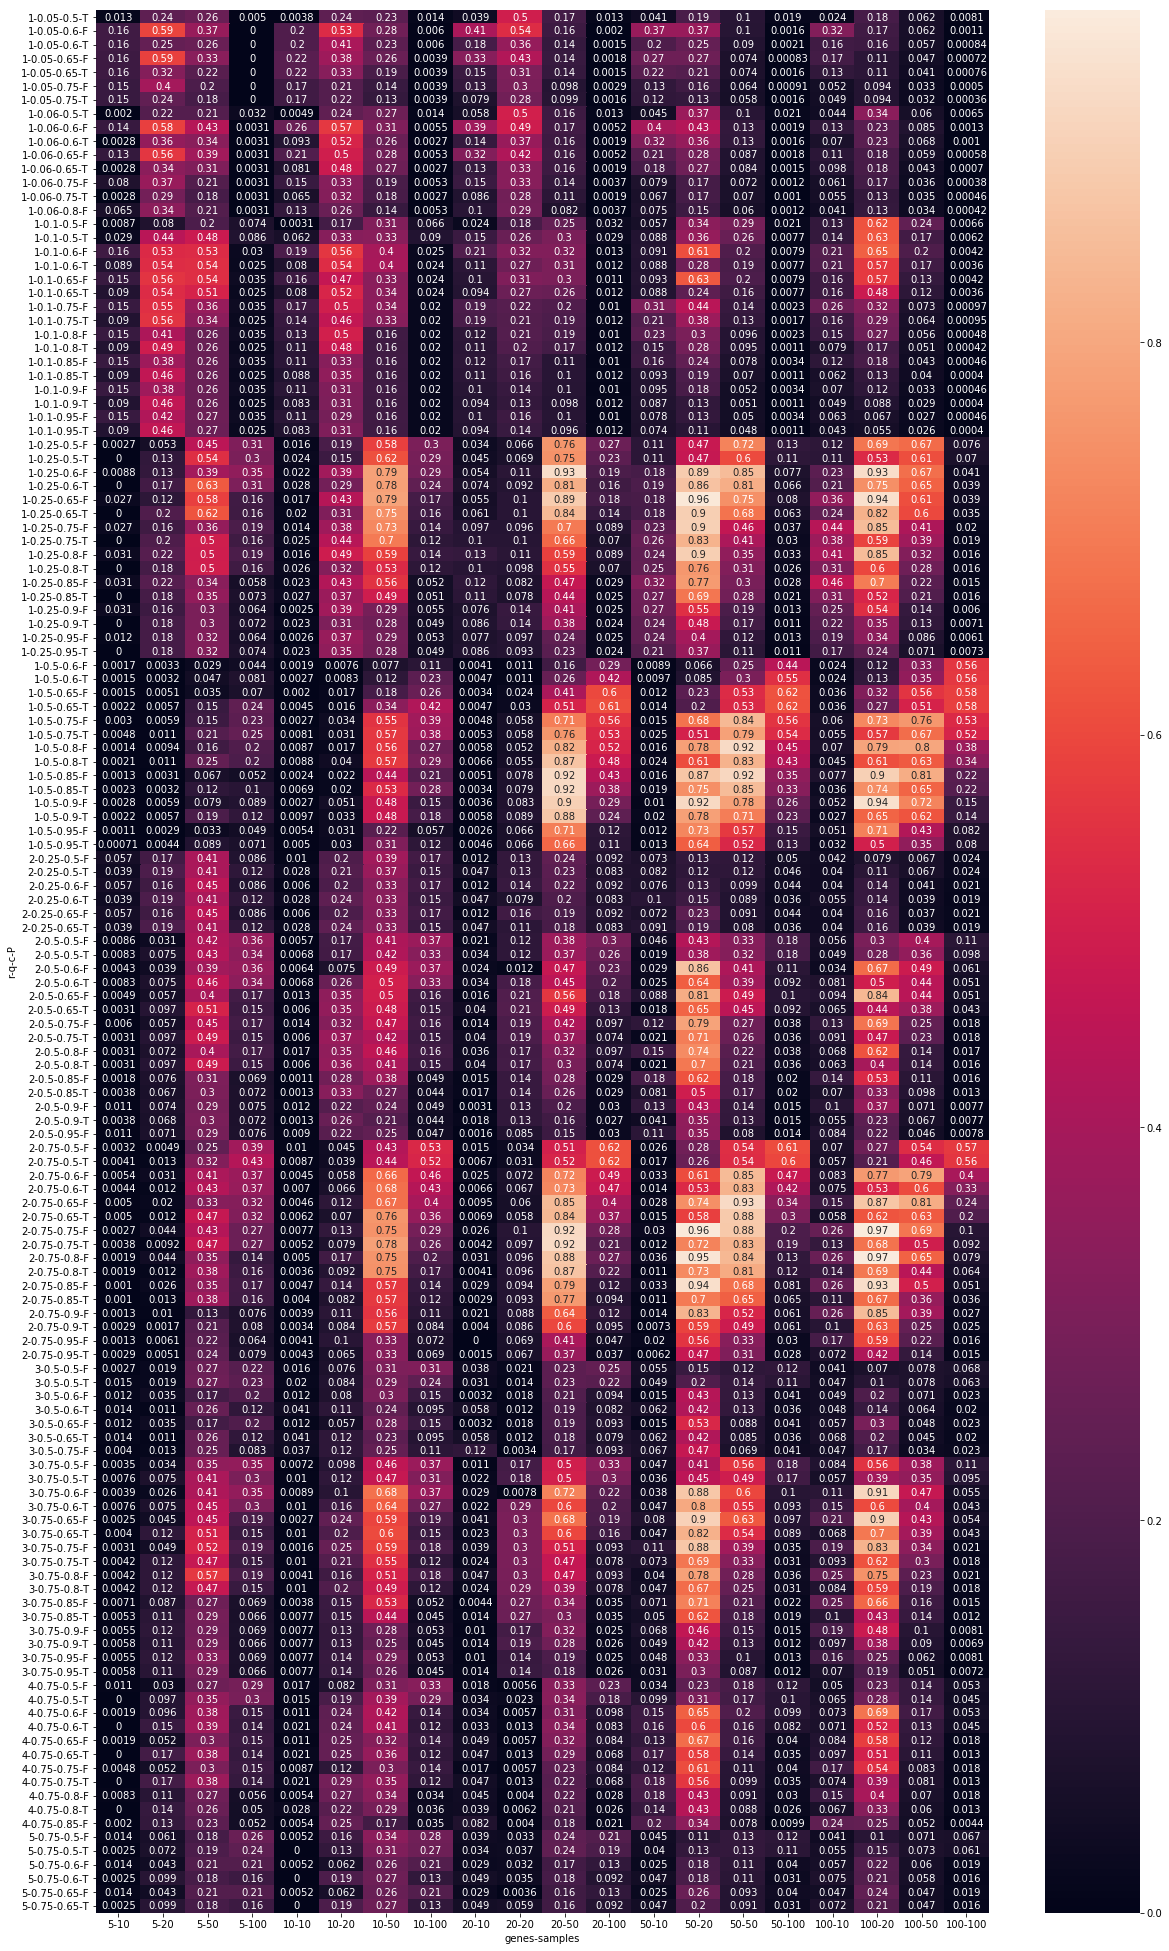

In [7]:
params = ["r","q","c","P"]
plot_file = img_outdir+"/" + tool_suffix+".F1_heatmap.svg"
heatmap_outfile =  tsv_outdir+ tool_suffix+".F1_heatmap.tsv"

heatmap = plot_F1_heatmap(results,params,f1_thr=0.1,
                          g_sizes = [5,10,20,50,100], s_sizes = [10,20,50,100],
                          plot=True,plot_file=plot_file,outfile=heatmap_outfile)

In [8]:
parameters

(('r', [1, 2, 3, 4, 5, 7, 10]),
 ('q', [0.05, 0.06, 0.1, 0.25, 0.5, 0.75]),
 ('c', [0.95, 0.75, 0.6, 0.65, 0.5, 0.8, 0.85, 0.9]),
 ('P', ['T', 'F']))

In [9]:
default_params = (1,0.06,0.95,"F")

In [12]:

r = get_opt_params(results, params, default_params=default_params, more_n_smaples = 0)
r

All 13440 runs considered

Optimal parameters (max. avg. F1 per bicluster):
	r=1;
	q=0.25;
	c=0.6;
	P=F;
	Max. avg. F1 per bicluster:0.376±0.337
	avg. F1 per best match:0.328±0.313
	biclusters per run:10.0±0.0
With default parameters:
	r=1;
	q=0.06;
	c=0.95;
	P=F;
	avg. F1 per bicluster:0.083±0.094
	avg. F1 per best match:0.058±0.069
	biclusters per run:10.0±0.0


F1 per bicluster                                      \
                           mean       std count       max       min   
r  q    c    P                                                        
1  0.25 0.60 F         0.376344  0.337355    20  0.932407  0.008755   
        0.65 F         0.371940  0.339488    20  0.959524  0.017298   
2  0.75 0.75 F         0.366721  0.355771    20  0.969103  0.002703   
        0.60 F         0.365997  0.303189    20  0.845466  0.004458   
        0.65 F         0.365233  0.331224    20  0.927021  0.004600   
1  0.25 0.60 T         0.358294  0.314772    20  0.864255  0.000000   
        0.65 T         0.344943  0.316379    20  0.895992  0.000000   
   0.50 0.75 F         0.344112  0.313984    20  0.841676  0.002750   
2  0.75 0.80 F         0.341894  0.351412    20  0.966727  0.001861   
1  0.50 0.80 F         0.341850  0.335717    20  0.923761  0.001450   
2  0.75 0.60 T         0.329378  0.276156    20  0.826330  0.004430   
        0.65 T         0.328472  0.304396    20  0.882849  0.004995   
1  0.50 0.75 T         0.324585  0.284876    20  0.786535  0.004797   
        0.85 F         0.320373  0.361788    20  0.922317  0.001288   
   0.25 0.75 F         0.316770  0.286500    20  0.900254  0.014272   
   0.50 0.80 T         0.314741  0.294573    20  0.868621  0.002099   
2  0.75 0.75 T         0.313302  0.315893    20  0.923886  0.003794   
3  0.75 0.65 F         0.311367  0.290789    20  0.903466  0.002546   
1  0.25 0.80 F         0.309832  0.268282    20  0.895012  0.015640   
3  0.75 0.60 F         0.304390  0.309240    20  0.912759  0.003892   
1  0.50 0.85 T         0.302373  0.322573    20  0.922317  0.002321   
   0.25 0.50 F         0.300626  0.263885    20  0.760696  0.002703   
        0.75 T         0.298206  0.256536    20  0.828814  0.000000   
   0.50 0.90 F         0.298064  0.351347    20  0.942225  0.002674   
2  0.75 0.85 F         0.295192  0.320822    20  0.937971  0.001015   
1  0.25 0.50 T         0.289339  0.244210    20  0.751119  0.000000   
2  0.75 0.80 T         0.288494  0.309937    20  0.870007  0.001861   
        0.50 F         0.286443  0.241269    20  0.615546  0.003221   
3  0.75 0.60 T         0.285414  0.247662    20  0.804713  0.007589   
2  0.75 0.50 T         0.282662  0.240045    20  0.615546  0.004103   
...                         ...       ...   ...       ...       ...   
10 0.06 0.80 F         0.000000  0.000000    20  0.000000  0.000000   
        0.75 T         0.000000  0.000000    20  0.000000  0.000000   
             F         0.000000  0.000000    20  0.000000  0.000000   
        0.65 T         0.000000  0.000000    20  0.000000  0.000000   
             F         0.000000  0.000000    20  0.000000  0.000000   
   0.05 0.90 T         0.000000  0.000000    20  0.000000  0.000000   
   0.06 0.60 F         0.000000  0.000000    20  0.000000  0.000000   
        0.50 T         0.000000  0.000000    20  0.000000  0.000000   
             F         0.000000  0.000000    20  0.000000  0.000000   
   0.10 0.50 T         0.000000  0.000000    20  0.000000  0.000000   
        0.60 F         0.000000  0.000000    20  0.000000  0.000000   
             T         0.000000  0.000000    20  0.000000  0.000000   
        0.90 T         0.000000  0.000000    20  0.000000  0.000000   
   0.05 0.80 T         0.000000  0.000000    20  0.000000  0.000000   
        0.85 F         0.000000  0.000000    20  0.000000  0.000000   
             T         0.000000  0.000000    20  0.000000  0.000000   
        0.90 F         0.000000  0.000000    20  0.000000  0.000000   
7  0.05 0.65 T         0.000000  0.000000    20  0.000000  0.000000   
10 0.10 0.95 T         0.000000  0.000000    20  0.000000  0.000000   
             F         0.000000  0.000000    20  0.000000  0.000000   
        0.90 F         0.000000  0.000000    20  0.000000  0.000000   
        0.65 F         0.000000  0.000000    20  0.000000  0.000000   
        0.85 T         0.000000  0.0000